Rede Neural - Perceptron

Função Sigmoid.

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import math

sigmoid = lambda x: 1.0 / (1 + np.exp(-x))

Desenhando a função sigmoid:

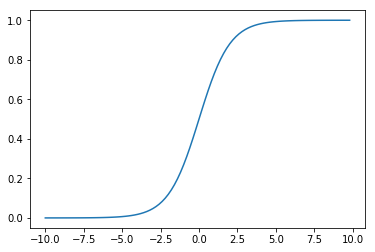

In [2]:
x = np.arange(-10., 10., 0.2)
values = [sigmoid(item) for item in x]

plt.plot(x, values)
plt.show()

Função auxiliar para ler dados:

In [3]:
def loadDataSet(file):
    features = []; labels = []
    with open(file) as fr:
        for line in fr.readlines():
            f1, f2, label = line.strip().split()
            # add bias value.
            features.append([1.0, float(f1), float(f2)])
            labels.append(int(label))
    return features, labels

Função de treinamento:

In [4]:
def gradAscent(features, labels, alpha=0.1, maxCycles=20000, precision=0.03):
    # matrix with N rows and 3 columns
    # 1 f1_01 f2_01
    # 1 f1_02 f2_02
    # ...
    # 1 f1_N f2_N
    F = np.mat(features)
    
    # matrix with 3 rows and N columns
    # 1     1     ... 1
    # f1_01 f1_02 ... f1_03
    # f2_01 f2_02 ... f2_03
    FT = F.transpose()

    # matrix with N rows and 1 column
    # became a matrix with 1 rows and N columns
    # values are either 0 or 1
    # l1 l2 l3 ... LN
    LT = np.mat(labels).transpose()

    # N rows and 3 cols
    nRow, nCol = np.shape(F)

    # matrix with 3 rows and 1 column
    weights = np.ones((nCol, 1))
    
    for k in range(maxCycles):
        # dot product between the matrix F[N, 3] and weigths[3, 1]
        # which gives a matrix h = [N, 1]
        # [1] w1 * 1 + w2 * f1_01 + wN * f2_01
        # [2] w1 * 1 + w2 * f1_02 + wN * f2_02
        # ...
        # [N] w1 * 1 + w2 * f1_N  + wN * f2_N
        h = F * weights

        # sigmoid classify h as 0 or 1
        # subtract s(h) from LT[1, N]
        # [1] l1 - s(h1)
        # [2] l2 - s(h2)
        # ...
        # [N] lN - s(hN)
        error = LT - sigmoid(h)
        
        # square root each error and calculate the average
        # [1] ((l1 - s(h1)) ** 2 + (l2 - s(h2)) ** 2 + ... + (lN - s(hN)) ** 2) / N 
        sme = np.mean(np.asarray(error)**2)
        
        if (sme < precision):
            print('Epochs: %d\n' % (k))
            break
        
        # calculate the gradient
        # weights[3, 1] + 0.1 * FT[3, N] * error[N, 1]
        # = weights[3, 1] + 0.1 * FTerror[3, 1]
        # [1] w1 + 0.1 * 1     * error[1] + 0.1 * 1     * error[2] + ... + 0.1 * 1     * error[N], 
        #     w2 + 0.1 * f1_01 * error[1] + 0.1 * f1_02 * error[2] + ... + 0.1 * f1_0N * error[N],
        #     w3 + 0.1 * f2_01 * error[1] + 0.1 * f2_02 * error[2] + ... + 0.1 * f2_0N * error[N]
        weights = weights + (alpha * FT * error)
        
    return weights

Modelo treinado:

In [5]:
features, labels = loadDataSet('trainingset.txt')
weights = gradAscent(features, labels)
print (weights)

Epochs: 86

[[ 71.8135133 ]
 [ 11.28854468]
 [-10.08488433]]


Desenhando o modelo treinado:

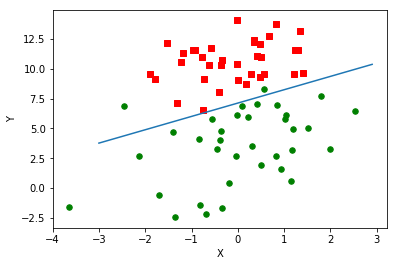

In [6]:
def plotBoundary(features, labels, weights):
    FT = np.matrix(features).transpose()
    
    def get_series_by_label(lblName):
        lbl = np.array(labels) == lblName
        return np.extract(lbl, FT[1]), np.extract(lbl, FT[2])

    xcord1, ycord1 = get_series_by_label(0)
    xcord2, ycord2 = get_series_by_label(1)
    
    fig = plt.figure()
    # add plot - 1 row, 1 column, first subplot
    ax = fig.add_subplot(111)
    
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
    ax.scatter(xcord2, ycord2, s=30, c='green')

    # draw boundary line
    x = np.array(np.arange(-3.0, 3.0, 0.1))
    y = np.array((-weights[0] - (weights[1] * x)) / weights[2])[0]
    ax.plot(x, y)
    
    plt.xlabel('X'); plt.ylabel('Y');
    plt.show()

features, labels = loadDataSet('trainingset.txt')
plotBoundary(features, labels, weights)

We can classify a new dataset, by following:

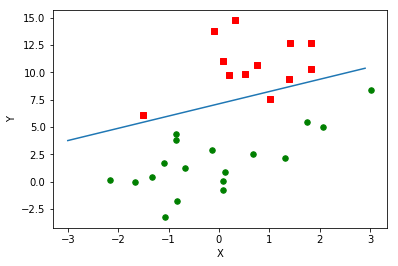

1 of 30 errors.
Accuracy: 96.67


In [7]:
classify = lambda p: 1 if sigmoid(p) > 0.5 else 0

features, labels = loadDataSet('testSet.txt')

prob = np.matrix(features) * weights
prediction = np.apply_along_axis(classify, 1, prob)
result = prediction == labels
hit = sum(result)
totalSamples = len(result)

plotBoundary(features, labels, weights)

print ('%d of %d errors.' % (totalSamples - hit, totalSamples))
print ('Accuracy: %0.2f' % (hit * 100.0 / totalSamples)) 